In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydantic.v1 import BaseSettings
from ydata_profiling import ProfileReport

%matplotlib inline

In [2]:
# Reading dataset
master_data = pd.read_csv('master_data_combined.csv')
master_data.head()

,subject_id,hadm_id,age,age_bucket,gender,ethnicity,ethnicity_combined,admission_type,admission_type_combined,first_careunit,...,respiratory_rate,temperature_fahrenheit,height_cm,admission_weight_lbs,mixed_venous_o2_sat,o2_saturation_pulseoxymetry2,pH_arterial,pH_venous,pH_soft,pH_dipstick
0,12119071,29485743,50,36 to 50,M,ASIAN,ASIAN,SURGICAL SAME DAY ADMISSION,Surgical Same Day Admission,Neuro Stepdown,...,14.500000,98.000000,NaN,NaN,NaN,96.357143,NaN,NaN,NaN,NaN
1,15533649,29728210,82,>75,F,ASIAN,ASIAN,OBSERVATION ADMIT,Observation,Neuro Stepdown,...,18.626374,97.840000,NaN,135.7,NaN,94.968750,NaN,NaN,NaN,6.0
2,16332808,29666020,40,36 to 50,F,ASIAN,ASIAN,SURGICAL SAME DAY ADMISSION,Surgical Same Day Admission,Neuro Stepdown,...,15.500000,98.366667,NaN,NaN,NaN,99.083333,NaN,NaN,NaN,NaN
3,19129188,21086531,49,36 to 50,F,ASIAN,ASIAN,SURGICAL SAME DAY ADMISSION,Surgical Same Day Admission,Neuro Stepdown,...,17.750000,99.300000,NaN,NaN,NaN,98.666667,NaN,NaN,NaN,NaN
4,13245229,26127407,25,21 to 35,M,ASIAN,ASIAN,OBSERVATION ADMIT,Observation,Neuro Stepdown,...,16.888889,98.065000,NaN,NaN,NaN,97.962963,NaN,NaN,NaN,NaN


In [3]:
# information about the dataset
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69009 entries, 0 to 69008
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subject_id                             69009 non-null  int64  
 1   hadm_id                                69009 non-null  int64  
 2   age                                    69009 non-null  int64  
 3   age_bucket                             69009 non-null  object 
 4   gender                                 69009 non-null  object 
 5   ethnicity                              69009 non-null  object 
 6   ethnicity_combined                     69009 non-null  object 
 7   admission_type                         69009 non-null  object 
 8   admission_type_combined                69009 non-null  object 
 9   first_careunit                         69009 non-null  object 
 10  first_careunit_combined                69009 non-null  object 
 11  ic

In [4]:
master_data.describe()

,subject_id,hadm_id,age,icu_los,hospital_expire_flag,heart_rate_mean,gcs_eye_opening,gcs_verbal_response,gcs_motor_response,non_invasive_blood_pressure_diastolic,...,respiratory_rate,temperature_fahrenheit,height_cm,admission_weight_lbs,mixed_venous_o2_sat,o2_saturation_pulseoxymetry2,pH_arterial,pH_venous,pH_soft,pH_dipstick
count,6.900900e+04,6.900900e+04,69009.000000,69009.000000,69009.000000,69007.000000,68842.000000,68835.000000,68827.000000,68325.000000,...,68953.000000,68129.000000,3.530600e+04,57491.000000,7485.000000,68949.000000,33464.000000,23237.000000,0.0,25227.000000
mean,1.499423e+07,2.498366e+07,63.167036,3.660620,0.109174,85.734759,3.527594,3.927408,5.529571,66.451853,...,19.460362,98.420667,2.281927e+02,180.049216,566.454118,102.691272,304.306445,196.323492,NaN,5.935103
std,2.884607e+06,2.883811e+06,16.916463,5.295551,0.311860,392.808716,0.650498,1.300639,0.911775,55.905438,...,66.352467,29.321874,1.115234e+04,137.670269,20490.137797,912.389148,13093.540159,10717.581445,NaN,0.715368
min,1.000003e+07,2.000009e+07,18.000000,0.001250,0.000000,-495.975669,1.000000,1.000000,1.000000,14.500000,...,2.000000,0.000000,0.000000e+00,0.000000,16.000000,35.000000,0.000000,0.000000,NaN,5.000000
25%,1.248962e+07,2.248806e+07,53.000000,1.108113,0.000000,74.269231,3.315789,3.103807,5.400000,57.545455,...,16.724138,97.950000,1.630000e+02,144.300000,62.230769,95.610390,7.350000,7.330000,NaN,5.500000
50%,1.499385e+07,2.497100e+07,65.000000,1.980463,0.000000,83.407643,3.769231,4.500000,6.000000,64.325000,...,18.771536,98.286667,1.700000e+02,171.800000,68.857143,96.777778,7.387778,7.380000,NaN,6.000000
75%,1.750585e+07,2.747324e+07,76.000000,3.901065,0.000000,93.468258,4.000000,5.000000,6.000000,71.971429,...,21.211268,98.679524,1.780000e+02,204.600000,76.000000,97.865517,7.425000,7.420000,NaN,6.500000
max,1.999999e+07,2.999983e+07,91.000000,133.667280,1.000000,103185.164948,4.000000,5.000000,6.000000,6447.769231,...,17340.558824,7647.574194,2.095680e+06,22086.350000,999999.000000,217103.911111,999999.000000,999999.000000,NaN,9.000000


In [5]:
# Calculating Null's in each column
master_data.isnull().sum()

subject_id                                   0
hadm_id                                      0
age                                          0
age_bucket                                   0
gender                                       0
ethnicity                                    0
ethnicity_combined                           0
admission_type                               0
admission_type_combined                      0
first_careunit                               0
first_careunit_combined                      0
icu_los                                      0
hospital_expire_flag                         0
heart_rate_mean                              2
gcs_eye_opening                            167
gcs_verbal_response                        174
gcs_motor_response                         182
non_invasive_blood_pressure_diastolic      684
non_invasive_blood_pressure_mean           689
respiratory_rate                            56
temperature_fahrenheit                     880
height_cm    

<Axes: >

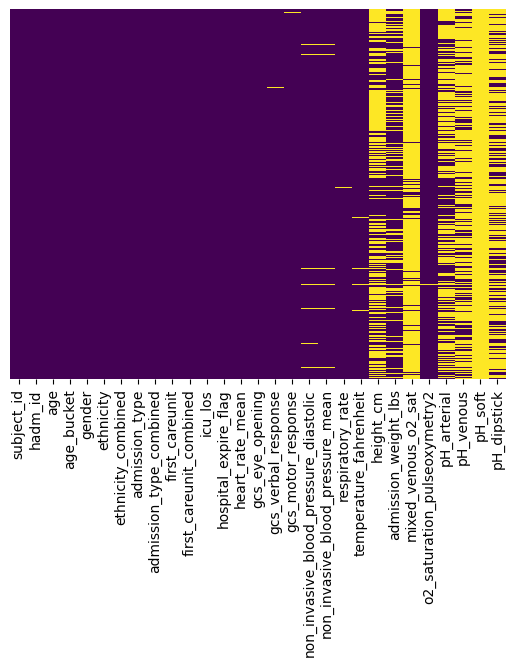

In [6]:
sns.heatmap(master_data.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [7]:
# calculating fill rate of each column
fill_rates = master_data.count() / len(master_data) * 100
fill_rates

subject_id                               100.000000
hadm_id                                  100.000000
age                                      100.000000
age_bucket                               100.000000
gender                                   100.000000
ethnicity                                100.000000
ethnicity_combined                       100.000000
admission_type                           100.000000
admission_type_combined                  100.000000
first_careunit                           100.000000
first_careunit_combined                  100.000000
icu_los                                  100.000000
hospital_expire_flag                     100.000000
heart_rate_mean                           99.997102
gcs_eye_opening                           99.758003
gcs_verbal_response                       99.747859
gcs_motor_response                        99.736266
non_invasive_blood_pressure_diastolic     99.008825
non_invasive_blood_pressure_mean          99.001580
respiratory_

In [33]:
## dropping columns where fill rate is < 50%
data = master_data.copy()
data.drop(['pH_soft','pH_arterial','pH_venous','mixed_venous_o2_sat','icu_los','age','ethnicity','admission_type','first_careunit'],axis = 1, inplace = True)

In [34]:
# Define condition
condition_1 = data['non_invasive_blood_pressure_diastolic'] > 200
condition_2 = data['non_invasive_blood_pressure_mean'] > 200

# Replace values in 'non_invasive_blood_pressure_diastolic' column based on the condition
data.loc[condition_1, 'non_invasive_blood_pressure_diastolic'] = data.loc[condition_1, 'non_invasive_blood_pressure_mean']
data.loc[condition_2, 'non_invasive_blood_pressure_mean'] = data.loc[condition_1, 'non_invasive_blood_pressure_diastolic']

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69009 entries, 0 to 69008
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   subject_id                             69009 non-null  int64  
 1   hadm_id                                69009 non-null  int64  
 2   age_bucket                             69009 non-null  object 
 3   gender                                 69009 non-null  object 
 4   ethnicity_combined                     69009 non-null  object 
 5   admission_type_combined                69009 non-null  object 
 6   first_careunit_combined                69009 non-null  object 
 7   hospital_expire_flag                   69009 non-null  int64  
 8   heart_rate_mean                        69007 non-null  float64
 9   gcs_eye_opening                        68842 non-null  float64
 10  gcs_verbal_response                    68835 non-null  float64
 11  gc

In [36]:
data = data[(data['heart_rate_mean'] >= 0) & (data['heart_rate_mean'] <= 500)]
data = data[(data['respiratory_rate'] >= 0) & (data['respiratory_rate'] <= 100)]
data = data[(data['temperature_fahrenheit'] >= 0) & (data['temperature_fahrenheit'] <= 250)]
data = data[(data['admission_weight_lbs'] >= 0) & (data['admission_weight_lbs'] <= 1000)]
data = data[(data['o2_saturation_pulseoxymetry2'] >= 0) & (data['o2_saturation_pulseoxymetry2'] <= 100)]
data = data[(data['height_cm'] >= 0) & (data['height_cm'] <= 300)]

In [37]:
data.describe()

,subject_id,hadm_id,hospital_expire_flag,heart_rate_mean,gcs_eye_opening,gcs_verbal_response,gcs_motor_response,non_invasive_blood_pressure_diastolic,non_invasive_blood_pressure_mean,respiratory_rate,temperature_fahrenheit,height_cm,admission_weight_lbs,o2_saturation_pulseoxymetry2,pH_dipstick
count,3.333200e+04,3.333200e+04,33332.000000,33332.000000,33320.000000,33321.000000,33318.000000,33056.000000,33044.000000,33332.000000,33332.000000,33332.000000,33332.000000,33332.000000,14717.000000
mean,1.498232e+07,2.498933e+07,0.120545,84.787242,3.414399,3.603425,5.377546,64.166881,77.258700,19.339948,98.297958,168.771031,181.409502,96.699995,5.915349
std,2.886284e+06,2.880499e+06,0.325602,13.523472,0.631385,1.318739,0.909826,10.794748,10.544212,3.338193,2.171892,14.194742,52.442057,1.959243,0.689273
min,1.000003e+07,2.000015e+07,0.000000,28.727273,1.000000,1.000000,1.000000,18.000000,24.666667,8.395833,0.000000,0.000000,0.000000,41.500000,5.000000
25%,1.249351e+07,2.250213e+07,0.000000,75.567147,3.160000,2.600000,5.125000,56.964286,69.849283,16.980344,97.950000,163.000000,147.000000,95.796714,5.500000
50%,1.496667e+07,2.497610e+07,0.000000,83.915174,3.569830,3.933333,5.718462,63.300000,76.199291,19.000000,98.300000,170.000000,174.700000,96.904762,6.000000
75%,1.748828e+07,2.747614e+07,0.000000,93.371111,3.925511,5.000000,6.000000,70.396343,83.560351,21.354914,98.723256,178.000000,208.100000,97.903226,6.333333
max,1.999944e+07,2.999983e+07,1.000000,484.632558,4.000000,5.000000,6.000000,195.359431,195.276596,63.839506,171.825000,292.000000,924.200000,100.000000,9.000000


In [38]:
#data.to_csv('mortality_data_for_analysis.csv')

<Axes: >

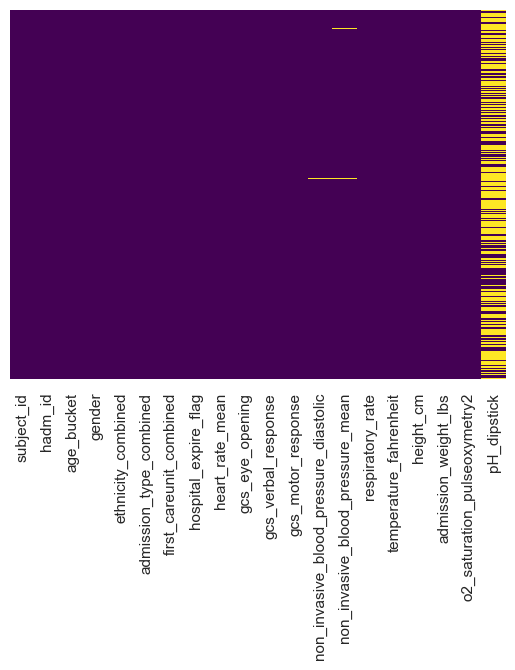

In [39]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap='viridis')

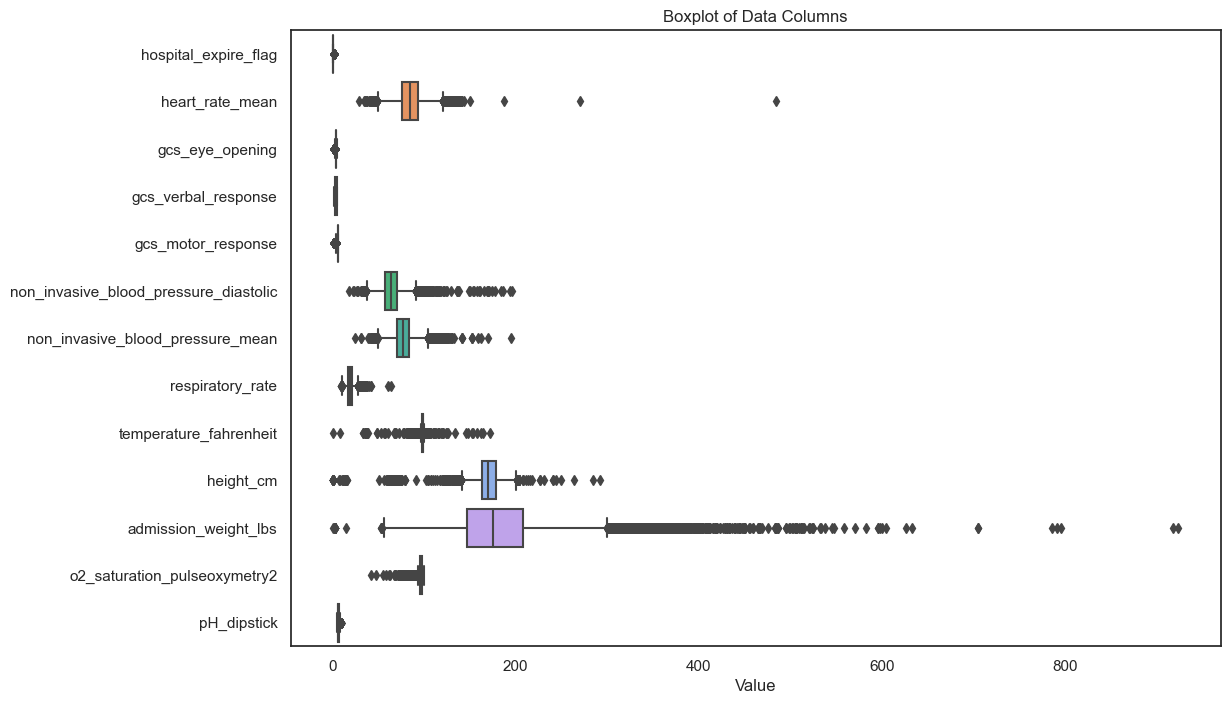

In [41]:
data_df = data.copy()
data_df1 = data.copy()
data_df1.drop(['subject_id', 'hadm_id'], axis=1, inplace=True)  # Dropping columns inplace

# Set up the figure size
plt.figure(figsize=(12, 8))

# Box plot for each column in the DataFrame
sns.boxplot(data=data_df1, orient='h')  # 'orient='h'' for horizontal orientation
plt.title('Boxplot of Data Columns')
plt.xlabel('Value')
plt.show()

In [42]:
# Calculate z-scores for each column
z_scores = np.abs((data_df - data_df.mean()) / data_df.std())

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Identify outliers by checking where z-score exceeds the threshold
outliers = z_scores > threshold

# Count outliers in each column
outliers_count = outliers.sum()
print(outliers_count)

admission_type_combined                    0
admission_weight_lbs                     410
age_bucket                                 0
ethnicity_combined                         0
first_careunit_combined                    0
gcs_eye_opening                          885
gcs_motor_response                       871
gcs_verbal_response                        0
gender                                     0
hadm_id                                    0
heart_rate_mean                          126
height_cm                                236
hospital_expire_flag                       0
non_invasive_blood_pressure_diastolic    208
non_invasive_blood_pressure_mean         219
o2_saturation_pulseoxymetry2             284
pH_dipstick                              254
respiratory_rate                         239
subject_id                                 0
temperature_fahrenheit                   121
dtype: int64


C:\Users\krishika.R\AppData\Local\Temp\ipykernel_24380\514097629.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((data_df - data_df.mean()) / data_df.std())
C:\Users\krishika.R\AppData\Local\Temp\ipykernel_24380\514097629.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((data_df - data_df.mean()) / data_df.std())


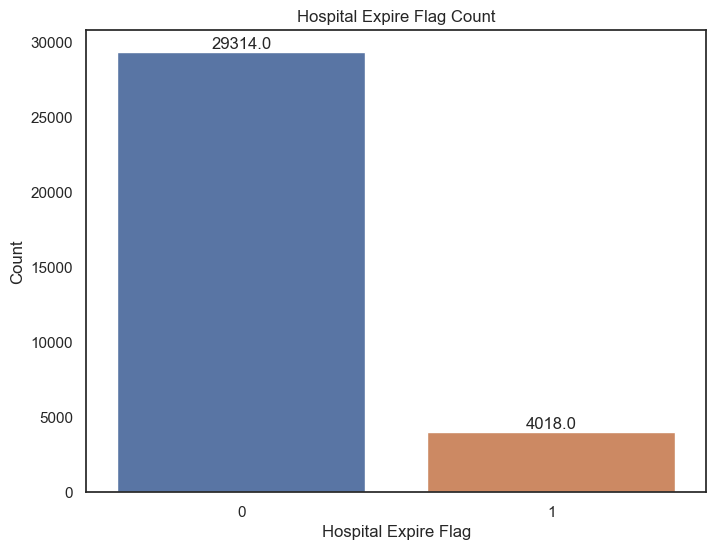

In [43]:
# Assuming 'data_df' is your DataFrame
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='hospital_expire_flag', data=data_df)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Hospital Expire Flag Count')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Count')
plt.show()

In [44]:
# chceking count of target variable
(29314/(29314+4018))*100

87.94551782071282

C:\Users\krishika.R\AppData\Local\Temp\ipykernel_24380\3308019622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()
C:\Users\krishika.R\AppData\Local\Temp\ipykernel_24380\3308019622.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


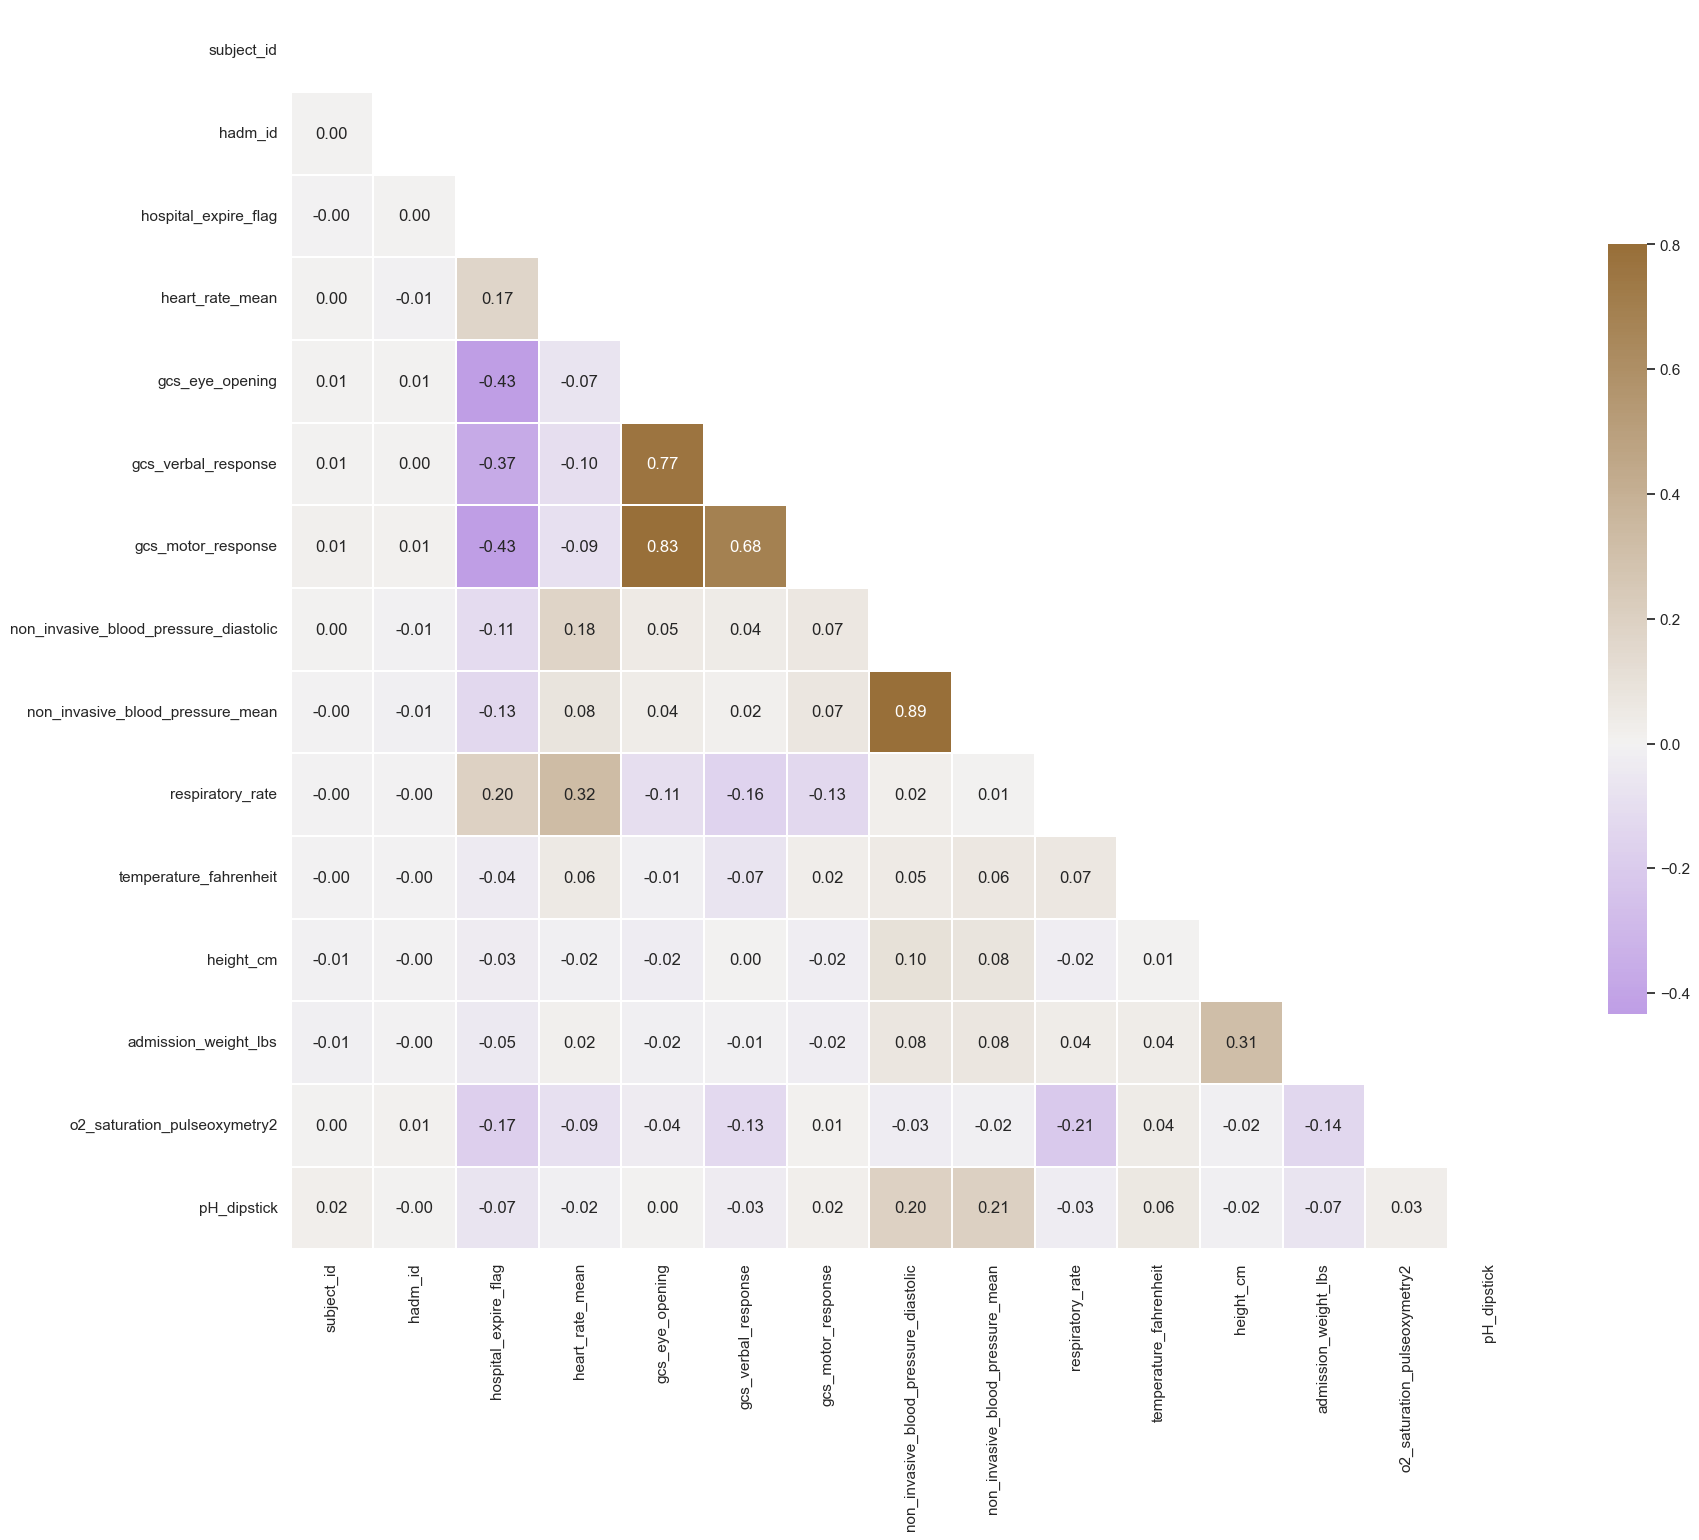

In [45]:
sns.set(style="white")
corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask,vmax =.8, cmap=cmap, center=0,fmt= '.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});

In [47]:
data_df.head()

,subject_id,hadm_id,age_bucket,gender,ethnicity_combined,admission_type_combined,first_careunit_combined,hospital_expire_flag,heart_rate_mean,gcs_eye_opening,gcs_verbal_response,gcs_motor_response,non_invasive_blood_pressure_diastolic,non_invasive_blood_pressure_mean,respiratory_rate,temperature_fahrenheit,height_cm,admission_weight_lbs,o2_saturation_pulseoxymetry2,pH_dipstick
14,18274125,24283808,51 to 75,M,ASIAN,Emergency,Neuro SICU/Intermediate/Stepdown,0,85.341954,2.971698,4.443396,5.858491,72.387931,86.382609,17.167665,99.037500,160.0,130.700000,98.734104,6.0
15,19231889,28296491,51 to 75,M,ASIAN,Observation,Neuro SICU/Intermediate/Stepdown,0,48.448276,4.000000,5.000000,6.000000,89.259259,100.703704,14.068966,97.744444,173.0,139.933333,97.827586,NaN
24,10642913,23526783,51 to 75,F,ASIAN,Emergency,Neuro SICU/Intermediate/Stepdown,0,72.779412,4.000000,5.000000,6.000000,61.894737,81.771930,15.632653,98.554545,160.0,130.700000,97.562500,6.0
29,16436556,20163123,51 to 75,M,ASIAN,Observation,Neuro SICU/Intermediate/Stepdown,0,83.416667,3.840000,4.840000,6.000000,80.419355,94.413793,15.304348,98.411765,168.0,124.075000,95.812500,NaN
33,18301841,29664765,21 to 35,F,ASIAN,Emergency,TSICU,0,89.142276,3.444444,2.238095,5.888889,61.273171,71.990244,16.817073,99.174324,157.0,131.800000,99.072581,6.5


In [50]:
data_df.to_csv('master_data_combined_before_encoding.csv')

In [51]:
df = data_df

# Apply one-hot encoding to 'admission_type' and 'first_careunit'
df_encoded = pd.get_dummies(df, columns=['admission_type_combined', 'first_careunit_combined','ethnicity_combined','gender','age_bucket'])
df_encoded.head()

,subject_id,hadm_id,hospital_expire_flag,heart_rate_mean,gcs_eye_opening,gcs_verbal_response,gcs_motor_response,non_invasive_blood_pressure_diastolic,non_invasive_blood_pressure_mean,respiratory_rate,...,ethnicity_combined_PORTUGUESE,ethnicity_combined_SOUTH AMERICAN,ethnicity_combined_WHITE,gender_F,gender_M,age_bucket_21 to 35,age_bucket_36 to 50,age_bucket_51 to 75,age_bucket_<20,age_bucket_>75
14,18274125,24283808,0,85.341954,2.971698,4.443396,5.858491,72.387931,86.382609,17.167665,...,0,0,0,0,1,0,0,1,0,0
15,19231889,28296491,0,48.448276,4.000000,5.000000,6.000000,89.259259,100.703704,14.068966,...,0,0,0,0,1,0,0,1,0,0
24,10642913,23526783,0,72.779412,4.000000,5.000000,6.000000,61.894737,81.771930,15.632653,...,0,0,0,1,0,0,0,1,0,0
29,16436556,20163123,0,83.416667,3.840000,4.840000,6.000000,80.419355,94.413793,15.304348,...,0,0,0,0,1,0,0,1,0,0
33,18301841,29664765,0,89.142276,3.444444,2.238095,5.888889,61.273171,71.990244,16.817073,...,0,0,0,1,0,1,0,0,0,0


In [53]:
df_encoded.to_csv('master_data_combined_after_encoding.csv',index=False)

In [54]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33332 entries, 14 to 69007
Data columns (total 39 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   subject_id                                                    33332 non-null  int64  
 1   hadm_id                                                       33332 non-null  int64  
 2   hospital_expire_flag                                          33332 non-null  int64  
 3   heart_rate_mean                                               33332 non-null  float64
 4   gcs_eye_opening                                               33320 non-null  float64
 5   gcs_verbal_response                                           33321 non-null  float64
 6   gcs_motor_response                                            33318 non-null  float64
 7   non_invasive_blood_pressure_diastolic                         3305

In [ ]:
df = data_df
profile = ProfileReport(df, title="Profiling Report")

profile.to_file(output_file='report.html')

In [55]:
import sweetviz as sv
report = sv.analyze(data_df)
report.show_html('Sweetviz_Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
